
# Dimensionality reduction via linear discriminant analysis
Principal component analysis (PCA) and linear discriminant analysis (LDA) are two data preprocessing linear transformation techniques that are often used for dimensionality reduction in order to select relevant features that can be used in the final machine learning algorithm. PCA is an unsupervised algorithm that is used for feature extraction in high-dimensional and correlated data. PCA achieves dimensionality reduction by transforming features into orthogonal component axes of maximum variance in a dataset. The goal of LDA is to find the feature subspace that optimizes class separability. Hence, LDA is a supervised algorithm. In this code, we illustrate the implementation of LDA using the iris dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(precision=4)

In [3]:
file_path = "iris.data"
df = pd.read_csv(file_path, header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Encoding categorical class labels
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df[4].values)

In [5]:
#Standardization of features
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(df.iloc[:,range(0,4)].values)

In [6]:
# Construction within-class covariant scatter matrix S_W
S_W = np.zeros((4,4))
for i in range(3):
    S_W += np.cov(X_train_std[y==i].T)
    

In [7]:
#Construction between-class scatter matrix S_B
N=np.bincount(y) # number of samples for given class
vecs=[]
[vecs.append(np.mean(X_train_std[y==i],axis=0)) for i in range(3)] # class means
mean_overall = np.mean(X_train_std, axis=0) # overall mean
S_B=np.zeros((4,4))
for i in range(3):
    S_B += N[i]*(((vecs[i]-mean_overall).reshape(4,1)).dot(((vecs[i]-mean_overall).reshape(1,4))))
    

In [8]:
#Calculation of sorted eigenvalues and eigenvectors of inverse(S_W)dot(S_B)
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0], reverse=True)
print('Eigenvalues in decreasing order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in decreasing order:

1581.325932186763
13.600776328162324
2.233044981586705e-13
3.7422465181580165e-14


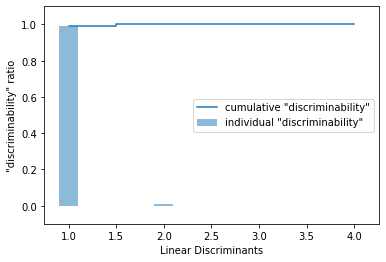

In [9]:
#Plotting main LDA components
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1, 5), discr, width=0.2,alpha=0.5, align='center',label='individual "discriminability"')
plt.step(range(1, 5), cum_discr, where='mid',label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.show()

In [10]:
#Projection of original features onto the new feature space
W=np.hstack((eigen_pairs[0][1][:, ].reshape(4,1),eigen_pairs[1][1][:, ].reshape(4,1))).real
X_train_lda = X_train_std.dot(W)

In [11]:
#Plotting transformed features in LDA subspace
data=pd.DataFrame(X_train_lda)
data['class']=y
data.columns=["LD1","LD2","class"]
data.head()

,LD1,LD2,class
0,-1.790936,0.115414,0
1,-1.583202,-0.265463,0
2,-1.663881,-0.083657,0
3,-1.514646,-0.225901,0
4,-1.807076,0.189973,0


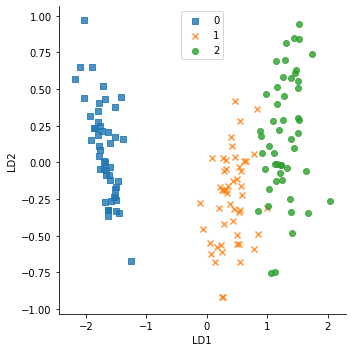

In [13]:
#Plot visualization
markers = ['s', 'x','o']
sns.lmplot(x="LD1", y="LD2", data=data, markers=markers,fit_reg=False, hue='class', legend=False)
plt.legend(loc='upper center')
plt.show()

In [14]:
#LDA implementation via scikit-learn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y)

In [15]:
data=pd.DataFrame(X_train_lda)
data['class']=y
data.columns=["LD1","LD2","class"]
data.head()

,LD1,LD2,class
0,-8.084953,0.328454,0
1,-7.147163,-0.755473,0
2,-7.511378,-0.238078,0
3,-6.837676,-0.642885,0
4,-8.157814,0.540639,0


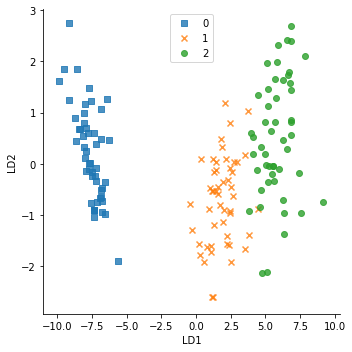

In [16]:
markers = ['s', 'x','o']
colors = ['r', 'b','g']
sns.lmplot(x="LD1", y="LD2", data=data, hue='class', markers=markers,fit_reg=False,legend=False)
plt.legend(loc='upper center')
plt.show()

# LDA vs PCA from analysis
The given iris dataset classification from the plot clearly shows LDA is more suitable for this particular classification. 
LDA is very useful to find dimensions which aim at seperating cluster, thus you will have to know clusters before. LDA is not neccesarily a classifier, but can be used as one. Thus LDA can only be used in supervised learning

PCA is a general approach for denoising and dimensionality reduction and does not require any further information such as class labels in supervised learning. Therefore it can be used in unsupervised learning.
PCA allows the collapsing of hundreds of spatial dimensions into a handful of lower spatial dimensions while preserving 70% - 90% of the important information. 3D objects cast 2D shadows. We can see the shape of an object from it's shadow. But we can't know everything about the shape from a single shadow. By having a small collection of shadows from different (globally optimal) angles, then we can know most things about the shape of an object. PCA helps reduce the 'Curse of Dimensionality' when modelling. LDA is for classification, it almost always outperforms Logistic Regression when modelling small data with well separated clusters. It also handles multi-class data and class imbalances.
Hence, LDA is more suitable for classification but for LDA improvement PCA is the answer. 